# Machine Learning Final Project

## Import the library 

In [1]:
# import the libraries
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff
from matplotlib import pyplot as plt

## Preprocess the Data - EEG Eye State data

Load the EEG Eye State data

In [2]:
# load the data. The function loadarff read most arff files and it can also read
# files with missing data, representing the data points as NaNs. This 
# information is important for data preprocessing. The data used here 
# has no missing values
EEG_Eye_State, meta = loadarff('EEGEyeState.arff')

# number of attributes are 14
# number of samples are 14980

In [3]:
# meta contains information about the arff file, as shown below is the attributes
meta

Dataset: EEG_DATA
	AF3's type is numeric
	F7's type is numeric
	F3's type is numeric
	FC5's type is numeric
	T7's type is numeric
	P7's type is numeric
	O1's type is numeric
	O2's type is numeric
	P8's type is numeric
	T8's type is numeric
	FC6's type is numeric
	F4's type is numeric
	F8's type is numeric
	AF4's type is numeric
	eyeDetection's type is nominal, range is ('0', '1')

In [4]:
# EEG_Eye_State records the data of the arff file, accessible by attribute names
# When add the EEG_Eye_State data to matrix, each element in the matrix has the type numpy.bytes_, therefore need to convert to
# float or int type so data matrix could be manipulated without errors
# Turn EEG_Eye_State into matrix of data
Eye_State_data = np.array(EEG_Eye_State[meta.names()[0]].astype(float, copy = True)).reshape(14980,1)

# Add every input vector to Eye_State_data
for i in range(1,len(meta.names())-1):
    Eye_State_data = np.c_[Eye_State_data, np.array(EEG_Eye_State[meta.names()[i]]).astype(float, copy = True)]

# Label vector, including 0 or 1
Eye_State_label = np.array(EEG_Eye_State[meta.names()[len(meta.names())-1]].astype(int, copy = True)).reshape(14980,1)

In [5]:
print(Eye_State_data[0:3,:])

[[4329.23 4009.23 4289.23 4148.21 4350.26 4586.15 4096.92 4641.03 4222.05
  4238.46 4211.28 4280.51 4635.9  4393.85]
 [4324.62 4004.62 4293.85 4148.72 4342.05 4586.67 4097.44 4638.97 4210.77
  4226.67 4207.69 4279.49 4632.82 4384.1 ]
 [4327.69 4006.67 4295.38 4156.41 4336.92 4583.59 4096.92 4630.26 4207.69
  4222.05 4206.67 4282.05 4628.72 4389.23]]


## Preprocess the Data - Autism Adult data

Load the Autism Adult data

In [6]:
# load the data. The function loadarff read most arff files and it can also read
# files with missing data, representing the data points as NaNs. This 
# information is important for data preprocessing. The data used here 
# has some missing values. Need to find those 'missing data samples'.
Autism_Adult, meta = loadarff('AutismAdultData.arff')

# number of attributes are 21
# number of samples are 704

In [7]:
# meta contains information about the arff file, as shown below is the attributes
meta

Dataset: adult-weka.filters.unsupervised.attribute.NumericToNominal-Rfirst-10
	A1_Score's type is nominal, range is ('0', '1')
	A2_Score's type is nominal, range is ('0', '1')
	A3_Score's type is nominal, range is ('0', '1')
	A4_Score's type is nominal, range is ('0', '1')
	A5_Score's type is nominal, range is ('0', '1')
	A6_Score's type is nominal, range is ('0', '1')
	A7_Score's type is nominal, range is ('0', '1')
	A8_Score's type is nominal, range is ('0', '1')
	A9_Score's type is nominal, range is ('0', '1')
	A10_Score's type is nominal, range is ('0', '1')
	age's type is numeric
	gender's type is nominal, range is ('f', 'm')
	ethnicity's type is nominal, range is ('White-European', 'Latino', 'Others', 'Black', 'Asian', "'Middle Eastern '", 'Pasifika', "'South Asian'", 'Hispanic', 'Turkish', 'others')
	jundice's type is nominal, range is ('no', 'yes')
	austim's type is nominal, range is ('no', 'yes')
	contry_of_res's type is nominal, range is ("'United States'", 'Brazil', 'Spain',

In [8]:
# Autism_Adult records the data of the arff file, accessible by attribute names
# When add the Autism_Adult data to matrix, each element in the matrix has the type numpy.bytes_, therefore need to convert to
# int or str type so data matrix could be manipulated without errors
# Turn Autism_Adult into matrix of data
Autism_Adult_data = np.array(Autism_Adult[meta.names()[0]].astype(int, copy = True)).reshape(704,1)

# Add every integer input vector to Eye_State_data
for i in range(1,11):
    Autism_Adult_data = np.c_[Autism_Adult_data, np.array(Autism_Adult[meta.names()[i]]).astype(int, copy = True)]

# Add every string input vector to Eye_State_data
for i in range(11,17):
    Autism_Adult_data = np.c_[Autism_Adult_data, np.array(Autism_Adult[meta.names()[i]]).astype(str, copy = True)]

# Add integer input vector to Eye_State_data, 18th column
Autism_Adult_data = np.c_[Autism_Adult_data, np.array(Autism_Adult[meta.names()[17]]).astype(int, copy = True)]

for i in range(18,len(meta.names())):
    Autism_Adult_data = np.c_[Autism_Adult_data, np.array(Autism_Adult[meta.names()[i]]).astype(str, copy = True)]

# convert to DataFrame so manipulation be easily done 
Autism_frame = pd.DataFrame(data = Autism_Adult_data, columns = meta.names()[:])

# replace '?' with NaN, help to find columns of missing values
Autism_frame.replace('?',np.NaN, inplace = True)

# show the first 10 rows of data frame
Autism_frame.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,'United States',no,9,'18 and more',Self,YES
6,0,1,0,0,0,0,0,1,0,0,...,f,Black,no,no,'United States',no,2,'18 and more',Self,NO
7,1,1,1,1,0,0,0,0,1,0,...,m,White-European,no,no,'New Zealand',no,5,'18 and more',Parent,NO
8,1,1,0,0,1,0,0,1,1,1,...,m,White-European,no,no,'United States',no,6,'18 and more',Self,NO
9,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8,'18 and more','Health care professional',YES


__Discussion__ about preprocessing this data. As can be seen from the table above, there are some missing data points in the table. There are a few approaches: first, the missing values could take the _mean_ along the axis, here the axis should be the column. Second, the missing values might take the _median_ along the column or third, the _most frequent_. Unfortunately, all the missing values are in the _categorical_ input, thus _mean_ and _median_ could not be used. Mean of 'Latino' and 'Black' would make no numerical nor categorical sense here. The final solution is to use the _most frequent_. In fact, the row of missing values could be eliminated but given that there are only 704 samples and some information of that row might be very important to our model, elimination seems not to be a good idea.

Print the columns that have the missing values. As shown in table above, missing values are marked "NaN"

In [9]:
# print the columns that has the missing values
print(Autism_frame.columns[Autism_frame.isnull().any()])

Index(['ethnicity', 'relation'], dtype='object')


_ethnicity_ is 13th columns and _relation_ is 20th column. Now find the most frequent value is each column and assign that value to the missing values

In [10]:
# find the mode ( or most frequent value ) in each column
autism_mode = Autism_frame.mode(axis=0)

# assign most frequent value in column 'ethnicity' to the missing values
Autism_frame[meta.names()[12]].replace(np.NaN, autism_mode[meta.names()[12]].values[0],inplace = True)

# assign most frequent value in column 'relation' to the missing values
Autism_frame[meta.names()[19]].replace(np.NaN, autism_mode[meta.names()[19]].values[0],inplace = True)

Since there are categorical data in our matrix, there is a need to encode them so ML algorithms could be implemented on.

In [11]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
# encode only categorical attributes
for i in range(11,len(meta.names())):
    # since column 'result' is numeric, no encoding is needed for column 18th
    if i != 17: 
        Autism_frame[meta.names()[i]] = labelEncoder_X.fit_transform(Autism_frame[meta.names()[i]])

# Create data matrix for Autism Adult data
Autism_matrix = Autism_frame.iloc[:,:-1].values
Autism_label = Autism_frame.iloc[:,20].values
# Convert to integers
Autism_matrix = Autism_matrix.astype(int, copy = True)
Autism_label = Autism_label.astype(int, copy = True)

## Preprocess the Data - Air Quality UCI

Load the Air Quality UCI data

In [12]:
# load the data. The function read_csv read excel files and it can also read
# files with missing data, representing the data points as NaNs. This 
# information is important for data preprocessing. The data used here 
# has some missing values. Need to find those 'missing data samples'.
Air_Quality = pd.read_excel('AirQualityUCI.xlsx')

# show the first 10 rows of data frame
Air_Quality.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


__Discussion__ about preprocessing this data. The columns 'Date' and 'Time' are not used, therefore discarded. The missing values in this data are marked '-200'. There are a few approaches: first, the missing values could take the _mean_ along the axis, here the axis should be the column. Second, the missing values might take the _median_ along the column or third, the _most frequent_. Since the data's type is numerical, the _mean_ and _median_ can be used. Here _mean_ approach is utilized.

In [13]:
# Delete columns 'Date' and 'Time'
Air_Quality.drop(columns = ['Date', 'Time'], inplace = True)

In [14]:
# Count how many missing values does this data have
print("Column    Number of Missing Values")
      
for i in range(len(Air_Quality.columns)):
    count = (Air_Quality[Air_Quality.columns[i]]==-200).value_counts()[1]
    print("{}         {}".format(i+1,count))

Column    Number of Missing Values
1         1683
2         366
3         8443
4         366
5         366
6         1639
7         366
8         1642
9         366
10         366
11         366
12         366
13         366


The sensor responsible for 'NMHC (GT)' must be really bad, yielding too many missing or bad values. Therefore, need to discard from data. the 1st, 6th and 8th also yield many bad values, however, we would use the _mean_ approach dicussed above to replace the bad values. 11th column is the output temperature and it has 366 bad values. For the output, using the approaches above would not be a good idea. Also, 366 appears too often, therefore, the measurements must be wrong at those missing values. Eliminating all the rows that have missing values at output should be the optimal choice.

In [15]:
# show some rows that have missing values marked by '-200'
Air_Quality[Air_Quality['T'] == -200].head(10)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
524,1.7,-200.0,222,-200.0,-200.0,99.0,-200.0,72.0,-200.0,-200.0,-200.0,-200.0,-200.0
525,1.9,-200.0,197,-200.0,-200.0,108.0,-200.0,81.0,-200.0,-200.0,-200.0,-200.0,-200.0
526,2.3,-200.0,319,-200.0,-200.0,131.0,-200.0,93.0,-200.0,-200.0,-200.0,-200.0,-200.0
701,2.0,-200.0,137,-200.0,-200.0,129.0,-200.0,106.0,-200.0,-200.0,-200.0,-200.0,-200.0
702,2.4,-200.0,189,-200.0,-200.0,154.0,-200.0,109.0,-200.0,-200.0,-200.0,-200.0,-200.0
703,1.8,-200.0,159,-200.0,-200.0,118.0,-200.0,97.0,-200.0,-200.0,-200.0,-200.0,-200.0
704,1.0,-200.0,80,-200.0,-200.0,69.0,-200.0,83.0,-200.0,-200.0,-200.0,-200.0,-200.0
705,1.0,-200.0,66,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
706,1.0,-200.0,87,-200.0,-200.0,97.0,-200.0,79.0,-200.0,-200.0,-200.0,-200.0,-200.0
707,0.9,-200.0,79,-200.0,-200.0,145.0,-200.0,84.0,-200.0,-200.0,-200.0,-200.0,-200.0


In [16]:
# Delete the rows that have missing values at the output column vector
Air_Quality.drop(index = Air_Quality[Air_Quality['T'] == -200].index, inplace = True)

# Delete columns 'NMHC(GT)''
Air_Quality.drop(columns = ['NMHC(GT)'], inplace = True)

After dropping unnecessary column and row, count the number of missing values again. It can be easily
seen that our assumption was right, "366 appears too often, therefore, the measurements must be wrong at those missing values. Eliminating all the rows that have missing values at output should be the optimal choice."

In [17]:
# Count how many missing values does this data have
print("Column    Number of Missing Values")     
for i in range(len(Air_Quality.columns)):
    count = Air_Quality.shape[0] - (Air_Quality[Air_Quality.columns[i]]==-200).value_counts().to_dict()[0]
    print("{}         {}".format(i+1,count))

Column    Number of Missing Values
1         1647
2         0
3         0
4         0
5         1595
6         0
7         1598
8         0
9         0
10         0
11         0
12         0


Whether to drop column 1, 5 and 7 or not would somehow affect out Machine Learning model. Dropping 1595 samples is dropping 2/9 our data. Dropping columns 1,5 and 7 leaves us with 8 attributes. Which drop gives us more total benefit is worth considering. Here, I choose to drop 1595 rows and first column.

In [18]:
# Delete the rows that have missing values at the output column vector 
Air_Quality.drop(index = Air_Quality[Air_Quality['NOx(GT)'] == -200].index, inplace = True)

# Delete columns 'CO(GT)'
Air_Quality.drop(columns = ['CO(GT)'], inplace = True)

# number of attributes are 10
# number of samples are 7396

In [19]:
# Count how many missing values does this data have
print("Column    Number of Missing Values")
      
for i in range(len(Air_Quality.columns)):
    count = Air_Quality.shape[0] - (Air_Quality[Air_Quality.columns[i]]==-200).value_counts().to_dict()[0]
    print("{}         {}".format(i+1,count))

Column    Number of Missing Values
1         0
2         0
3         0
4         0
5         0
6         3
7         0
8         0
9         0
10         0
11         0


For column 6, the _mean_ approach is utilized

In [20]:
# Create data matrix for Air Qyality data
Air_Quality_matrix = Air_Quality.iloc[:,Air_Quality.columns != 'T'].values
Air_Quality_values = Air_Quality['T'].values

# Taking care of missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = -200, strategy = 'mean', axis = 0)
imputer = imputer.fit(Air_Quality_matrix[:,5:6])
Air_Quality_matrix[:,5:6] = imputer.transform(Air_Quality_matrix[:,5:6])

*****************************************************************************************************
*****************************************************************************************************

## Using k-Nearest Neighbor (k-NN) classification on EEG Eye State data

In [21]:
# Since k-NN classifier will be used  many times, it is necessary to write a function and output the class that test point 
# belongs to. In k-NN, the training phase is redundant since k-NN measures the distance between test point and training set. 

def kNN_classifier(train, train_labels, k, test):
    """
    k-Nearest Neigbor classifer that returns either label '0' or label '1'
    Inputs: 
        train: Training data matrix
        train_labels: Labels for the training data matrix
        k: Number of nearest neighbors in k-NN (Euclidean distance)
        test: Test sample
    Ouput: test_label: Estimated label for test 
    """
    # Compute distances between all training samples and the test sample
    dist = np.array([np.linalg.norm(test - train[i,:]) for i in range(train.shape[0])])
    
    # Sort the distances and find the indices of the k-NNs
    sorted_dist_ind = dist.argsort() # Sorting
    kNN_labels = train_labels[sorted_dist_ind[0:k]] # Indices
    
    # Return the label that occurs most frequently within the k-NNs
    if np.size(np.where(kNN_labels==0)) >= np.size(np.where(kNN_labels==1)):
        return 0
    else:
        return 1

What needs to be done next is to find the best k. By using 5-fold cross validation, we could find k that has the smallest prediction error. <br>
__Discussion__ about cross-validation procedure for k-NN
1. The dataset needs to be split into five folds and label them from 1 to 5
2. Tuning for the best k
> Iteration 1: Train on folds 1, 2, and 3; validate (test) on fold 4; leave fold 5 untouched <br>
> Iteration 2: Train on folds 2, 3, and 4; validate (test) on fold 5; leave fold 1 untouched <br>
> Iteration 3: Train on folds 3, 4, and 5; validate (test) on fold 1; leave fold 2 untouched <br>
> Iteration 4: Train on folds 4, 5, and 1; validate (test) on fold 2; leave fold 3 untouched <br>
> Iteration 5: Train on folds 5, 1, and 2; validate (test) on fold 3; leave fold 4 untouched <br>

Average the prediction errors on validation set, the best k is the one that has smallest error

3. With the best lambda, test the prediction error
> Iteration 1: Train on folds 1, 2, 3, and 4; test on fold 5 <br>
> Iteration 2: Train on folds 2, 3, 4, and 5; test on fold 1 <br>
> Iteration 3: Train on folds 3, 4, 5, and 1; test on fold 2 <br>
> Iteration 4: Train on folds 4, 5, 1, and 2; test on fold 3 <br>
> Iteration 5: Train on folds 5, 1, 2, and 3; test on fold 4 <br>

Average the prediction errors on the test set is the final perfomance assesment 

What I found out when I run this procedure is it takes a lot of time. Therefore, I use k-NN classifier from sklearn to boost the speed up. 

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# 1. The dataset needs to be split into five folds and label them from 1 to 5
# 2. Tuning for the best k
# Since there are 14980 samples, it is divisible by 5.
fold_size = int(Eye_State_data.shape[0]/5)   

validation_error = [] # The average validation error

# validate the value of k from 1 to 29
for k in range(1,30,2):
    error = [] # error of each validation, get renewed for every k
    # specify how many nearest neighbors we need
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p =2)
    # t is the iteration, running from 1 to 5
    for t in range(1,6): 
        test_start = (t-1)*fold_size #start of the test fold
        test_end = t*fold_size     # end position of test data in data
        # select the rest of data to be test
        # test = Eye_State_data[test_start:test_end,:]   
        # select the portion of label matched with test
        # label_test = Eye_State_label[test_start:test_end] 

        i = (t-1+4)%5+1 # i adjusted so the procedure could go precisely 
        start = (i-1)*fold_size  # start position of validation data in data
        end = i*fold_size     # end position of validation data in data

        validation = Eye_State_data[start:end,:]  # select the portion of data to be validation data
        label_validation = Eye_State_label[start:end] # select the portion of label matched with validation
        train = np.delete(Eye_State_data, [range(start,end),range(test_start,test_end)], 0)  # select the rest of data to be train data 
        label_train = np.delete(Eye_State_label, [range(start,end),range(test_start,test_end)]) # select the portion of label matched with train

        classifier.fit(train, label_train)
        # Calculation of the average classification error
        ave_clf_err = 1-classifier.score(validation, label_validation)
        error.append(ave_clf_err)
    
    validation_error.append(sum(error)/5)
    

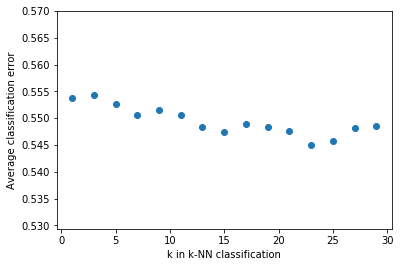

In [23]:
k = np.array([i for i in range(1,30,2)])
# Plot of the average classification error as a function of the values of k
plt.scatter(k, validation_error)
plt.xlabel('k in k-NN classification')
plt.ylabel('Average classification error')
plt.show()

In [24]:
# The best k we could find here is
best_k = 2*np.argmin(validation_error)+1
print("The best k here is {}".format(best_k))

The best k here is 23


__Discussion__ about data and k-NN: I use sklearn k-NN classifier since my own classifier runs crazy slow and takes almost half an hour. sklearn classifier is so much faster since it is optimized to run on data. There are few reasons why even though my function is correct but cannot run fast. First, my data has 14 attributes and number of samples is 14980, which is quite a lot. My function is not optimized to run on that much data. Second, it might be I am not careful with using my for loop, which leads to long compilation time. 

With the best k, now calculate the average prediction error on test set

In [25]:
# calculation of the size of each fold
fold_size = int(Eye_State_data.shape[0]/5)   

# initializie the list of test error
test_error = [] # The average test error
error = [] # error of each test set

# specify how many nearest neighbors we need
classifier = KNeighborsClassifier(n_neighbors = best_k, metric = 'minkowski', p =2)
# t is the iteration, running from 1 to 5
for t in range(1,6): 
    test_start = (t-1)*fold_size #start of the test fold
    test_end = t*fold_size     # end position of test data in data
    # select the rest of data to be test
    test = Eye_State_data[test_start:test_end,:]   
    # select the portion of label matched with test
    label_test = Eye_State_label[test_start:test_end]  
    # select the rest of data to be train data 
    train = np.delete(Eye_State_data, [range(test_start,test_end)], 0)  
    # select the portion of label matched with train
    label_train = np.delete(Eye_State_label, [range(test_start,test_end)])

    classifier.fit(train, label_train)
    # Calculation of the average classification error
    ave_clf_err = 1-classifier.score(test, label_test)
    error.append(ave_clf_err)

test_error.append(sum(error)/5)

In [26]:
# show the average prediction error
print("The average prediction error is {}".format(np.round(test_error,2)))

The average prediction error is [0.55]


__Discussion__ The prediction error is so high, worse than the probability of flipping a fair coin. There could be some factors affecting our model. One of them might be there is a need to normalize the data, which I will do next to see if the error get smaller. Even after normalizing the data, I don't think my function could be used since we are still dealing with high dimensional data. <br> <br>
Then, I will normalize data to see whether my function could run faster and find the similar best k

In [27]:
# normalizing the data
# Arranging training data so that each sample is a column in the data matrix
X = Eye_State_data.T # Data matrix

# Computation of the empirical mean of data, both as a vector and as a tiled matrix
mean_vec = X.mean(axis = 1)
mean_mat = np.tile(mean_vec.reshape(X.shape[0],1),[1,X.shape[1]])

# Centered data matrix
centered_X = (X - mean_mat)

# Computation of the empirical variance of data, as a vector and as a tiled matrix
var_vec = X.var(axis = 1)
var_mat = np.tile(var_vec.reshape(X.shape[0],1),[1,X.shape[1]])

normalized_Eye_State_data = (centered_X/np.sqrt(var_mat)).T

Apply the same procedure above to find best k

In [28]:
# 1. The dataset needs to be split into five folds and label them from 1 to 5
# 2. Tuning for the best k
# Since there are 14980 samples, it is divisible by 5.
fold_size = int(normalized_Eye_State_data.shape[0]/5)   

validation_error = [] # The average validation error

# validate the value of k from 1 to 29
for k in range(1,30,2):
    error = [] # error of each validation, get renewed for every k
    # specify how many nearest neighbors we need
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p =2)
    # t is the iteration, running from 1 to 5
    for t in range(1,6): 
        test_start = (t-1)*fold_size #start of the test fold
        test_end = t*fold_size     # end position of test data in data
        # select the rest of data to be test
#         test = normalized_Eye_State_data[test_start:test_end,:]   
        # select the portion of label matched with test
#         label_test = Eye_State_label[test_start:test_end] 

        i = (t-1+4)%5+1 # i adjusted so the procedure could go precisely 
        start = (i-1)*fold_size  # start position of validation data in data
        end = i*fold_size     # end position of validation data in data

        validation = normalized_Eye_State_data[start:end,:]  # select the portion of data to be validation data
        label_validation = Eye_State_label[start:end] # select the portion of label matched with validation
        # select the rest of data to be train data 
        train = np.delete(normalized_Eye_State_data, [range(start,end),range(test_start,test_end)], 0) 
        # select the portion of label matched with train
        label_train = np.delete(Eye_State_label, [range(start,end),range(test_start,test_end)]) 

        classifier.fit(train, label_train)
        # Calculation of the average classification error
        ave_clf_err = 1-classifier.score(validation, label_validation)
        error.append(ave_clf_err)
    
    validation_error.append(sum(error)/5)
 

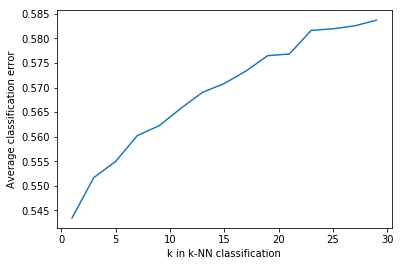

In [29]:
k = np.array([i for i in range(1,30,2)])
# Plot of the average classification error as a function of the values of k
plt.plot(k, validation_error)
plt.xlabel('k in k-NN classification')
plt.ylabel('Average classification error')
plt.show()

In [30]:
# The best k we could find here is
best_k = 2*np.argmin(validation_error)+1
print("The best k here is {}".format(best_k))

The best k here is 1


In [31]:
# calculation of the size of each fold
fold_size = int(Eye_State_data.shape[0]/5)   

# initializie the list of test error
test_error = [] # The average test error
error = [] # error of each test set

# specify how many nearest neighbors we need
classifier = KNeighborsClassifier(n_neighbors = best_k, metric = 'minkowski', p =2)
# t is the iteration, running from 1 to 5
for t in range(1,6): 
    test_start = (t-1)*fold_size #start of the test fold
    test_end = t*fold_size     # end position of test data in data
    # select the rest of data to be test
    test = normalized_Eye_State_data[test_start:test_end,:]   
    # select the portion of label matched with test
    label_test = Eye_State_label[test_start:test_end]  
    # select the rest of data to be train data 
    train = np.delete(normalized_Eye_State_data, [range(test_start,test_end)], 0)  
    # select the portion of label matched with train
    label_train = np.delete(Eye_State_label, [range(test_start,test_end)])

    classifier.fit(train, label_train)
    # Calculation of the average classification error
    ave_clf_err = 1-classifier.score(test, label_test)
    error.append(ave_clf_err)

test_error.append(sum(error)/5)

In [32]:
# show the average prediction error
print("The average prediction error of normalized data is {}".format(np.round(test_error,2)))

The average prediction error of normalized data is [0.54]


The average prediction error of normalized data is very slightly better than than of original data. Now we apply PCA and do k-NN classification with 2-D features. We use normalized data above. What I want to do here is to find out whether we could find out best k with dimensionality-reduced data and if the prediction error is smaller.

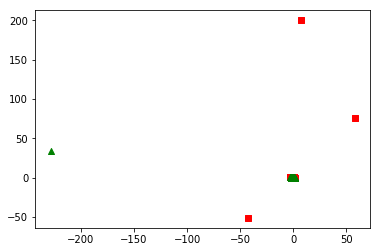

In [33]:
# Normalize data matrix
normalized_X = normalized_Eye_State_data.T

# Singular value decomposition of normalized data
U, s, Vh = np.linalg.svd(normalized_X)

# Matrix of the top two principal components of the normalized data matrix
U_2 = U[:,0:2]

# Compute the PCA-based features of the normalized data using the top-two principal components
X_2 = U_2.T@normalized_X

# Scatter plot for digits '0' and '1' using the two-dimensional PCA features
plt.scatter(X_2.T[np.where(Eye_State_label==0),0],X_2.T[np.where(Eye_State_label==0),1],c='r',marker='s')
plt.scatter(X_2.T[np.where(Eye_State_label==1),0],X_2.T[np.where(Eye_State_label==1),1],c='g',marker='^')
plt.show()

As can be seen from the graph and if you look at the table data, the sample data are very close to one another. Therefore, after normalizing or I don't even have to do the normalizing, the distance of 2 samples might be very small. k-NN is heavily based on the distance, therefore it is not suitable to work with this data. I will procedd to find the best k. 

In [34]:
PCA_Eye_State_data = X_2.T

# 1. The dataset needs to be split into five folds and label them from 1 to 5
# 2. Tuning for the best k
# Since there are 14980 samples, it is divisible by 5.
fold_size = int(PCA_Eye_State_data.shape[0]/5)   

validation_error = [] # The average validation error

# validate the value of k from 1 to 99
for k in range(1,30,2):
    error = [] # error of each validation, get renewed for every k
    # specify how many nearest neighbors we need
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p =2)
    # t is the iteration, running from 1 to 5
    for t in range(1,6): 
        test_start = (t-1)*fold_size #start of the test fold
        test_end = t*fold_size     # end position of test data in data
        # select the rest of data to be test
#         test = normalized_Eye_State_data[test_start:test_end,:]   
        # select the portion of label matched with test
#         label_test = Eye_State_label[test_start:test_end] 

        i = (t-1+4)%5+1 # i adjusted so the procedure could go precisely 
        start = (i-1)*fold_size  # start position of validation data in data
        end = i*fold_size     # end position of validation data in data

        validation = PCA_Eye_State_data[start:end,:]  # select the portion of data to be validation data
        label_validation = Eye_State_label[start:end] # select the portion of label matched with validation
        # select the rest of data to be train data 
        train = np.delete(PCA_Eye_State_data, [range(start,end),range(test_start,test_end)], 0) 
        # select the portion of label matched with train
        label_train = np.delete(Eye_State_label, [range(start,end),range(test_start,test_end)]) 

        classifier.fit(train, label_train)
        # Calculation of the average classification error
        ave_clf_err = 1-classifier.score(validation, label_validation)
        error.append(ave_clf_err)
    
    validation_error.append(sum(error)/5)


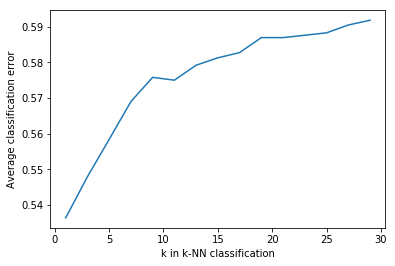

In [35]:
k = np.array([i for i in range(1,30,2)])
# Plot of the average classification error as a function of the values of k
plt.plot(k, validation_error)
plt.xlabel('k in k-NN classification')
plt.ylabel('Average classification error')
plt.show()

In [36]:
# The best k we could find here is
best_k = 2*np.argmin(validation_error)+1
print("The best k here is {}".format(best_k))

The best k here is 1


In [37]:
# calculation of the size of each fold
fold_size = int(Eye_State_data.shape[0]/5)   

# initializie the list of test error
test_error = [] # The average test error
error = [] # error of each test set

# specify how many nearest neighbors we need
classifier = KNeighborsClassifier(n_neighbors = best_k, metric = 'minkowski', p =2)
# t is the iteration, running from 1 to 5
for t in range(1,6): 
    test_start = (t-1)*fold_size #start of the test fold
    test_end = t*fold_size     # end position of test data in data
    # select the rest of data to be test
    test = normalized_Eye_State_data[test_start:test_end,:]   
    # select the portion of label matched with test
    label_test = Eye_State_label[test_start:test_end]  
    # select the rest of data to be train data 
    train = np.delete(normalized_Eye_State_data, [range(test_start,test_end)], 0)  
    # select the portion of label matched with train
    label_train = np.delete(Eye_State_label, [range(test_start,test_end)])

    classifier.fit(train, label_train)
    # Calculation of the average classification error
    ave_clf_err = 1-classifier.score(test, label_test)
    error.append(ave_clf_err)

test_error.append(sum(error)/5)

In [38]:
# show the average prediction error
print("The average prediction error of 2-feature data is {}".format(np.round(test_error,2)))

The average prediction error of 2-feature data is [0.54]


Not out of expectation, after applying PCA to the data, we could not find the best k for the model but the average 
prediction error is nearly the same with normalized data and orginal data. However, I try to run my own classifier and find out that the number of samples is too huge, up to 14980 samples. k-NN does not work well with large sample data. My classifier takes so long so I have to use classifier from sklearn.

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

## Using k-Nearest Neighbor (k-NN) classification on Autism Adult data

The previous data has too many samples and every sample is so close to one another, which might yield wrong results for our questions. In this dataset, I will try to implement my own classifier and try to prove that PCA-data could still help to get the best k. PCA-data should also have same average prediction error with original data. <br> <br>
However, look into the data table, Autism Adult has categorical data, which might be difficult for k-NN to implement, we will see what problems are in store for us.

What needs to be done is to find the best k. By using 5-fold cross validation, we could find k that has the smallest prediction error. <br>
__Discussion__ about cross-validation procedure for k-NN
1. The dataset needs to be split into five folds and label them from 1 to 5
2. Tuning for the best k
> Iteration 1: Train on folds 1, 2, and 3; validate (test) on fold 4; leave fold 5 untouched <br>
> Iteration 2: Train on folds 2, 3, and 4; validate (test) on fold 5; leave fold 1 untouched <br>
> Iteration 3: Train on folds 3, 4, and 5; validate (test) on fold 1; leave fold 2 untouched <br>
> Iteration 4: Train on folds 4, 5, and 1; validate (test) on fold 2; leave fold 3 untouched <br>
> Iteration 5: Train on folds 5, 1, and 2; validate (test) on fold 3; leave fold 4 untouched <br>

Average the prediction errors on validation set, the best k is the one that has smallest error

3. With the best lambda, test the prediction error
> Iteration 1: Train on folds 1, 2, 3, and 4; test on fold 5 <br>
> Iteration 2: Train on folds 2, 3, 4, and 5; test on fold 1 <br>
> Iteration 3: Train on folds 3, 4, 5, and 1; test on fold 2 <br>
> Iteration 4: Train on folds 4, 5, 1, and 2; test on fold 3 <br>
> Iteration 5: Train on folds 5, 1, 2, and 3; test on fold 4 <br>

Average the prediction errors on the test set is the final perfomance assesment 

In [39]:
Autism_matrix = Autism_matrix.astype(int, copy = True)
Autism_label.shape

(704,)

In [40]:
# 1. The dataset needs to be split into five folds and label them from 1 to 5
# 2. Tuning for the best k
# Since there are 704 samples, it is not divisible by 5.
fold_size = int(Autism_matrix.shape[0]/5)   

validation_error = [] # The average validation error

# validate the value of k from 1 to 29
for k in range(1,30,2):
    error = [] # error of each validation, get renewed for every k

    # t is the iteration, running from 1 to 5
    for t in range(1,6): 
        test_start = (t-1)*fold_size #start of the test fold
        test_end = t*fold_size     # end position of test data in data
        # select the rest of data to be test
        # test = Autism_matrix[test_start:test_end,:]   
        # select the portion of label matched with test
        # label_test = Autism_label[test_start:test_end] 

        i = (t-1+4)%5+1 # i adjusted so the procedure could go precisely 
        start = (i-1)*fold_size  # start position of validation data in data
        end = i*fold_size     # end position of validation data in data
        
        # select the portion of data to be validation data
        validation = Autism_matrix[start:end,:]  
        # select the portion of label matched with validation
        label_validation = (Autism_label[start:end]).reshape(validation.shape[0],1)
        # select the rest of data to be train data 
        train = np.delete(Autism_matrix, [range(start,end),range(test_start,test_end)], 0)  
        # select the portion of label matched with train
        label_train = (np.delete(Autism_label, [range(start,end),range(test_start,test_end)])).reshape(train.shape[0],1)

        # classify by using k-NN classifier
        est_labels = np.array([kNN_classifier(train, label_train, k, validation[i,:]) for i in range(validation.shape[0])])
        est_labels = est_labels.reshape(validation.shape[0],1)
        
        # error of the predicted labels
        err_label = np.sum(np.absolute(est_labels-label_validation))
        error.append(err_label/(validation.shape[0]))
    
    validation_error.append(sum(error)/5)

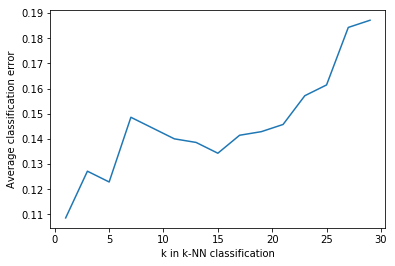

In [41]:
k = np.array([i for i in range(1,30,2)])
# Plot of the average classification error as a function of the values of k
plt.plot(k, validation_error)
plt.xlabel('k in k-NN classification')
plt.ylabel('Average classification error')
plt.show()

In [42]:
# The best k we could find here is
best_k = 2*np.argmin(validation_error)+1
print("The best k here is {}".format(best_k))

The best k here is 1


In [43]:
# calculation of the size of each fold
fold_size = int(Autism_matrix.shape[0]/5)   

# initializie the list of test error
test_error = [] # The average test error
error = [] # error of each test set

# t is the iteration, running from 1 to 5
for t in range(1,6): 
    test_start = (t-1)*fold_size #start of the test fold
    test_end = t*fold_size     # end position of test data in data
    # select the rest of data to be test
    test = Autism_matrix[test_start:test_end,:]   
    # select the portion of label matched with test
    label_test = (Autism_label[test_start:test_end]).reshape(test.shape[0],1)  
    # select the rest of data to be train data 
    train = np.delete(Autism_matrix, [range(test_start,test_end)], 0)  
    # select the portion of label matched with train
    label_train = (np.delete(Autism_label, [range(test_start,test_end)])).reshape(train.shape[0],1) 

    # classify by using k-NN classifier
    est_labels = np.array([kNN_classifier(train, label_train, best_k, test[i,:]) for i in range(test.shape[0])])
    est_labels = est_labels.reshape(test.shape[0],1)

    # error of the predicted labels
    err_label = np.sum(np.absolute(est_labels-label_test))
    error.append(err_label/(validation.shape[0]))

test_error.append(sum(error)/5)

In [44]:
# show the average prediction error
print("The average prediction error of test data is {}".format(np.round(test_error,2)))

The average prediction error of test data is [0.09]


Apply Principal Component Analysis on this data to see if we could find best k and same prediction error

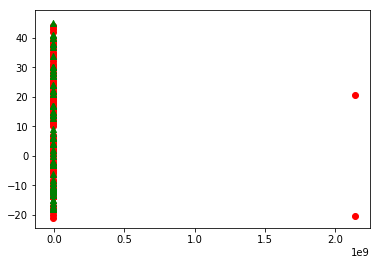

In [45]:
# Arranging training data so that each sample is a column in the data matrix
X = Autism_matrix.T # Data matrix

# Computation of the empirical mean of data, both as a vector and as a tiled matrix
mean_vec = X.mean(axis = 1)
mean_mat = np.tile(mean_vec.reshape(X.shape[0],1),[1,X.shape[1]])

# Centered data matrix
centered_X = X - mean_mat

# Singular value decomposition of centered data
U, s, Vh = np.linalg.svd(centered_X)

# Matrix of the top two principal components of the centered data matrix
U_2 = U[:,0:2]

# Compute the PCA-based features of the centered data using the top-two principal components
X_2 = U_2.T@centered_X

# Scatter plot for digits '0' and '1' using the two-dimensional PCA features
plt.scatter(X_2.T[np.where(Autism_label==0),0],X_2.T[np.where(Autism_label==0),1],c='r',marker='o')
plt.scatter(X_2.T[np.where(Autism_label==1),0],X_2.T[np.where(Autism_label==1),1],c='g',marker='^')
plt.show()

Now we apply kNN on this 2-feature dataset

In [46]:
# 1. The dataset needs to be split into five folds and label them from 1 to 5
# 2. Tuning for the best k

PCA_2_Autism_matrix =X_2.T

# Since there are 704 samples, it is not divisible by 5.
fold_size = int(PCA_2_Autism_matrix.shape[0]/5)   

validation_error = [] # The average validation error

# validate the value of k from 1 to 29
for k in range(1,30,2):
    error = [] # error of each validation, get renewed for every k

    # t is the iteration, running from 1 to 5
    for t in range(1,6): 
        test_start = (t-1)*fold_size #start of the test fold
        test_end = t*fold_size     # end position of test data in data
        # select the rest of data to be test
        # test = Autism_matrix[test_start:test_end,:]   
        # select the portion of label matched with test
        # label_test = Autism_label[test_start:test_end] 

        i = (t-1+4)%5+1 # i adjusted so the procedure could go precisely 
        start = (i-1)*fold_size  # start position of validation data in data
        end = i*fold_size     # end position of validation data in data
        
        # select the portion of data to be validation data
        validation = PCA_2_Autism_matrix[start:end,:]  
        # select the portion of label matched with validation
        label_validation = (Autism_label[start:end]).reshape(validation.shape[0],1)
        # select the rest of data to be train data 
        train = np.delete(PCA_2_Autism_matrix, [range(start,end),range(test_start,test_end)], 0)  
        # select the portion of label matched with train
        label_train = (np.delete(Autism_label, [range(start,end),range(test_start,test_end)])).reshape(train.shape[0],1)

        # classify by using k-NN classifier
        est_labels = np.array([kNN_classifier(train, label_train, k, validation[i,:]) for i in range(validation.shape[0])])
        est_labels = est_labels.reshape(validation.shape[0],1)
        
        # error of the predicted labels
        err_label = np.sum(np.absolute(est_labels-label_validation))
        error.append(err_label/(validation.shape[0]))
    
    validation_error.append(sum(error)/5)

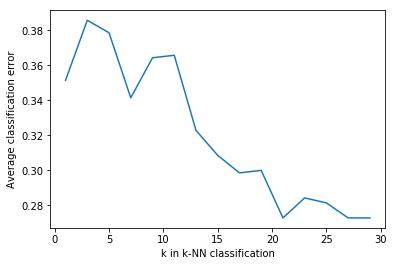

In [47]:
k = np.array([i for i in range(1,30,2)])
# Plot of the average classification error as a function of the values of k
plt.plot(k, validation_error)
plt.xlabel('k in k-NN classification')
plt.ylabel('Average classification error')
plt.show()

In [48]:
# The best k we could find here is
best_k = 2*np.argmin(validation_error)+1
print("The best k here is {}".format(best_k))

The best k here is 21


In [49]:
# calculation of the size of each fold
fold_size = int(PCA_2_Autism_matrix.shape[0]/5)   

# initializie the list of test error
test_error = [] # The average test error
error = [] # error of each test set

# t is the iteration, running from 1 to 5
for t in range(1,6): 
    test_start = (t-1)*fold_size #start of the test fold
    test_end = t*fold_size     # end position of test data in data
    # select the rest of data to be test
    test = PCA_2_Autism_matrix[test_start:test_end,:]   
    # select the portion of label matched with test
    label_test = (Autism_label[test_start:test_end]).reshape(test.shape[0],1)  
    # select the rest of data to be train data 
    train = np.delete(PCA_2_Autism_matrix, [range(test_start,test_end)], 0)  
    # select the portion of label matched with train
    label_train = (np.delete(Autism_label, [range(test_start,test_end)])).reshape(train.shape[0],1) 

    # classify by using k-NN classifier
    est_labels = np.array([kNN_classifier(train, label_train, best_k, test[i,:]) for i in range(test.shape[0])])
    est_labels = est_labels.reshape(test.shape[0],1)

    # error of the predicted labels
    err_label = np.sum(np.absolute(est_labels-label_test))
    error.append(err_label/(validation.shape[0]))

test_error.append(sum(error)/5)

In [50]:
# show the average prediction error
print("The average prediction error of test data is {}".format(np.round(test_error,2)))

The average prediction error of test data is [0.29]


__Discussion__ it turns out that applying PCA may not get to the same best k. The error rate after applying PCA is higher. Let find out the number of Principal Components that captures 99% of the variation in the data and apply kNN again to confirm above solution

In [51]:
r = 0; cum_sum = 0
data_energy = np.linalg.norm(centered_X)**2
for i in range(len(s)):
    cum_sum = cum_sum + s[i]**2
    if cum_sum/data_energy >= 0.99:
        r = i+1
        break
        
# Print the value of r
print('The calculated value of the integer r is {}.'.format(r))

The calculated value of the integer r is 1.


Even though 1 principal components capture 99% of variation, as prooved by 2, it will not give the same k or same average error. We will try with 5 principal components to see what happens.

In [52]:
# Matrix of the top one principal components of the centered data matrix
U_5 = U[:,0:5]

# Compute the PCA-based features of the centered data using the top-one principal components
X_5 = U_5.T@centered_X


In [53]:
# 1. The dataset needs to be split into five folds and label them from 1 to 5
# 2. Tuning for the best k

PCA_5_Autism_matrix =X_5.T

# Since there are 704 samples, it is not divisible by 5.
fold_size = int(PCA_5_Autism_matrix.shape[0]/5)   

validation_error = [] # The average validation error

# validate the value of k from 1 to 99
for k in range(1,30,2):
    error = [] # error of each validation, get renewed for every k

    # t is the iteration, running from 1 to 5
    for t in range(1,6): 
        test_start = (t-1)*fold_size #start of the test fold
        test_end = t*fold_size     # end position of test data in data
        # select the rest of data to be test
        # test = Autism_matrix[test_start:test_end,:]   
        # select the portion of label matched with test
        # label_test = Autism_label[test_start:test_end] 

        i = (t-1+4)%5+1 # i adjusted so the procedure could go precisely 
        start = (i-1)*fold_size  # start position of validation data in data
        end = i*fold_size     # end position of validation data in data
        
        # select the portion of data to be validation data
        validation = PCA_5_Autism_matrix[start:end,:]  
        # select the portion of label matched with validation
        label_validation = (Autism_label[start:end]).reshape(validation.shape[0],1)
        # select the rest of data to be train data 
        train = np.delete(PCA_5_Autism_matrix, [range(start,end),range(test_start,test_end)], 0)  
        # select the portion of label matched with train
        label_train = (np.delete(Autism_label, [range(start,end),range(test_start,test_end)])).reshape(train.shape[0],1)

        # classify by using k-NN classifier
        est_labels = np.array([kNN_classifier(train, label_train, k, validation[i,:]) for i in range(validation.shape[0])])
        est_labels = est_labels.reshape(validation.shape[0],1)
        
        # error of the predicted labels
        err_label = np.sum(np.absolute(est_labels-label_validation))
        error.append(err_label/(validation.shape[0]))
    
    validation_error.append(sum(error)/5)

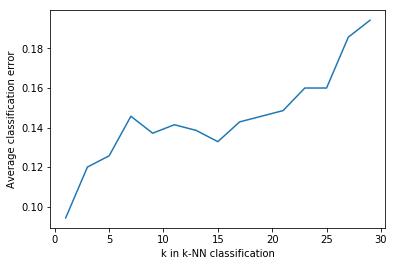

In [54]:
k = np.array([i for i in range(1,30,2)])
# Plot of the average classification error as a function of the values of k
plt.plot(k, validation_error)
plt.xlabel('k in k-NN classification')
plt.ylabel('Average classification error')
plt.show()

In [55]:
# The best k we could find here is
best_k = 2*np.argmin(validation_error)+1
print("The best k here is {}".format(best_k))

The best k here is 1


In [56]:
# calculation of the size of each fold
fold_size = int(PCA_5_Autism_matrix.shape[0]/5)   

# initializie the list of test error
test_error = [] # The average test error
error = [] # error of each test set

# t is the iteration, running from 1 to 5
for t in range(1,6): 
    test_start = (t-1)*fold_size #start of the test fold
    test_end = t*fold_size     # end position of test data in data
    # select the rest of data to be test
    test = PCA_5_Autism_matrix[test_start:test_end,:]   
    # select the portion of label matched with test
    label_test = (Autism_label[test_start:test_end]).reshape(test.shape[0],1)  
    # select the rest of data to be train data 
    train = np.delete(PCA_5_Autism_matrix, [range(test_start,test_end)], 0)  
    # select the portion of label matched with train
    label_train = (np.delete(Autism_label, [range(test_start,test_end)])).reshape(train.shape[0],1) 

    # classify by using k-NN classifier
    est_labels = np.array([kNN_classifier(train, label_train, best_k, test[i,:]) for i in range(test.shape[0])])
    est_labels = est_labels.reshape(test.shape[0],1)

    # error of the predicted labels
    err_label = np.sum(np.absolute(est_labels-label_test))
    error.append(err_label/(validation.shape[0]))

test_error.append(sum(error)/5)

In [57]:
# show the average prediction error
print("The average prediction error of test data is {}".format(np.round(test_error,2)))

The average prediction error of test data is [0.09]


__Discussion__ The more principal components, the more likely it is to get the same best k as the original data and same average prediction rate.

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

## Using Polynomial Regression on Air Quality UCI data

Polynomial Regression is a special case of Linear Regression, it augments the data into higher dimension. The coefficient estimation could be done by using least squares approach. Here I illustrate how augmenting the data into higher dimension is done. <br>
Assume we have a dataset that has 2 attributes, which is $x_{1}$ and $x_{2}$. The linear regression equation is <br>
\begin{equation}
Y = \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{0}
\end{equation}
The second order Polynomial Regression is:
\begin{equation}
Y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{1} x_{2} + \beta_{4} x_{1}^{2} + \beta_{5} x_{2}^{2}
\end{equation}
The term $x_{1}x_{2}$ is called _interaction_. As illustrated above, the number of terms added will grow faster than the degree of polynomial. In our dataset, we have 10 attributes. Shown below is graph of number of terms along with the degree of polynomial.

Text(0,0.5,'Number of terms')

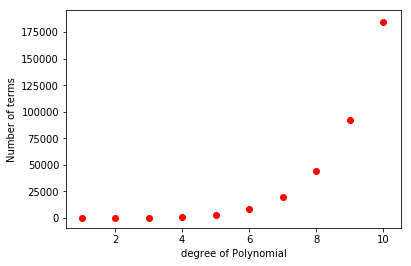

In [58]:
from sklearn.preprocessing import PolynomialFeatures

x = Air_Quality_matrix[0:1,:]

for i in range(1,11):
    # Plot of the number of terms along with the degree of polynomial
    poly_reg = PolynomialFeatures(degree = i)
    X_poly = poly_reg.fit_transform(x)
    plt.scatter(i, X_poly.shape[1], color = 'red')

plt.xlabel('degree of Polynomial')
plt.ylabel('Number of terms')

The number of terms grow exponentially. Therefore, I would want to use sklearn PolynomialFeatures to augment my data instead of doing it manually. Then we do 5-fold cross validation to see which degree gives out the best prediction error.

In [59]:
# adding more terms to my orginal data
from sklearn.preprocessing import PolynomialFeatures

# Since there are 7396 samples, it is not divisible by 5.
fold_size = int(Air_Quality_matrix.shape[0]/5)   
validation_error = [] # The average validation error

# validate the value of k from 1 to 10
for k in range(1,6):
    error = [] # error of each validation, get renewed for every k
    
    # augment the data into higher dimentsion
    poly_reg = PolynomialFeatures(degree = k)
    X_poly = poly_reg.fit_transform(Air_Quality_matrix)
    
    # t is the iteration, running from 1 to 5
    for t in range(1,6): 
        test_start = (t-1)*fold_size #start of the test fold
        test_end = t*fold_size     # end position of test data in data
        # select the rest of data to be test
        # test = Autism_matrix[test_start:test_end,:]   
        # select the portion of label matched with test
        # label_test = Autism_label[test_start:test_end] 

        i = (t-1+4)%5+1 # i adjusted so the procedure could go precisely 
        start = (i-1)*fold_size  # start position of validation data in data
        end = i*fold_size     # end position of validation data in data
        
        # select the portion of data to be validation data
        validation = X_poly[start:end,:]  
        # select the portion of label matched with validation
        value_validation = (Air_Quality_values[start:end]).reshape(validation.shape[0],1)
        # select the rest of data to be train data 
        train = np.delete(X_poly, [range(start,end),range(test_start,test_end)], 0)  
        # select the portion of label matched with train
        value_train = (np.delete(Air_Quality_values, [range(start,end),range(test_start,test_end)])).reshape(train.shape[0],1)

        w_fold = (np.linalg.inv(train.T@train))@(train.T)@value_train # calculate estimated coefficients
    
        predicted_value = validation@w_fold # estimated price
        # calculate the norm 2 of error and average the error
        error.append(np.linalg.norm(predicted_value - value_validation,ord = 2)/(validation.shape[0]))
    
    validation_error.append(sum(error)/5)

In [60]:
# The best degree we could find here is
best_degree = np.argmin(validation_error)+1
print("The best degree here is {}".format(best_degree))

The best degree here is 2


In [61]:
# calculation of the size of each fold
fold_size = int(Air_Quality_matrix.shape[0]/5)     

# initializie the list of test error
test_error = [] # The average test error
error = [] # error of each test set

#validate the value of i from 1 to 5   
for i in range(1,6):
    # augment the data into higher dimentsion
    poly_reg = PolynomialFeatures(degree = i)
    X_poly = poly_reg.fit_transform(Air_Quality_matrix)
    # t is the iteration, running from 1 to 5
    for t in range(1,6): 
        test_start = (t-1)*fold_size #start of the test fold
        test_end = t*fold_size     # end position of test data in data
        # select the rest of data to be test
        test = X_poly[test_start:test_end,:]   
        # select the portion of label matched with test
        value_test = (Air_Quality_values[test_start:test_end]).reshape(test.shape[0],1)  
        # select the rest of data to be train data 
        train = np.delete(X_poly, [range(test_start,test_end)], 0)  
        # select the portion of label matched with train
        value_train = (np.delete(Air_Quality_values, [range(test_start,test_end)])).reshape(train.shape[0],1) 

        w_fold = (np.linalg.inv(train.T@train))@(train.T)@value_train # calculate estimated coefficients

        predicted_value = test@w_fold # estimated price
        # calculate the norm 2 of error and average the error
        error.append(np.linalg.norm(predicted_value - value_test,ord = 2)/(test.shape[0]))

    test_error.append(sum(error)/5)

In [62]:
# Compare the validation error and test error
print("Degree    Validation error    Test error ")     
for i in range(1,6):
    print("{}              {}          {}".format(i,np.round(validation_error[i-1],2), np.round(test_error[i-1],2)))

Degree    Validation error    Test error 
1              0.09          0.09
2              0.04          0.12
3              1.16          3.78
4              7.92          7.61
5              303.52          433.47


__Discussion__ The best degree of polynomial is found to be 2 at validation. However, the test error is smallest at degree 1. This is an example of overfitting, when the model performs very well on training but poorly on unseen data. Our dataset show more pattern of linearity than higher-dimensional features.